# Evaluating Predictions

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer

pd.set_option('display.max_colwidth', -1)

### Load Data

In [2]:
onion_soup_reviews = pd.read_csv('../data/interim/onion_soup_reviews.csv')
onion_soup_sentences = pd.read_csv('../data/interim/onion_soup_sentences.csv')
onion_soup_chunks = pd.read_csv('../data/interim/onion_soup_chunks.csv')

In [3]:
onion_soup_reviews.shape

(868, 6)

In [4]:
onion_soup_sentences.shape

(1007, 2)

In [5]:
onion_soup_chunks.shape

(1005, 1)

In [6]:
sentiment_df = pd.read_csv('../data/predictions/sentiment_df.csv')

## Sentiment Analysis

### Predict sentiment score using `SentimentIntensityAnalyzer`

`SentimentIntensityAnalyzer` returns sentiment scores between `[0, 1]` for positive, negative, and neutral sentiments, `[-1, 1]` for the compound score.

In [7]:
def get_sentiments(docs):
    '''
    Returns a Dataframe of sentiment scores with columns:
    'compound', 'pos', 'neu', 'neg'
    
    For each doc, 'pos', 'neu', 'neg' scores add to 1.
    'compound' is an overall sentiment score of the doc.
    '''
    # Instantiate SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    sentiments = []

    # Generate sentiment score for each review
    for doc in docs:
        sentiment = sia.polarity_scores(doc)
        sentiments.append(sentiment)

    return pd.DataFrame(sentiments)

In [8]:
def transform_to_stars(n, lower = -1, upper = 1):
    '''
    Transform n to a discrete value between 1 to 5, inclusive.
    '''
    if n < lower or n > upper:
        print(f'OutOfRangeError: Set n between [{lower},{upper}]')
        return None
    
    interval = np.round((upper - lower) / 9, 2)
    bins = [np.round(lower + i*interval, 2) for i in range(0,10)]
#     print(interval)
#     print(bins)
    
    # one star is the lowest rating, can't get 0.5 star
    n_categories = 9
    
    if n >= 0.5:
        return 5.0
    elif n >= 0.46:
        return 4.5
    elif n >= .42: 
        return 4.0
    elif n >= .38:
        return 3.5
    elif n >= .32:
        return 3.0
    elif n >= .28:        
        return 2.5
    elif n >= .24:
        return 2.0
    elif n >= .20:
        return 1.5
    else: 
        return 1.0
    
    for i in range(2,11):
        if bins[i-2] <= n <= bins[i-1]:
#             print(i)
            return i/2

    if n >= bins[-1]:
        return 5.0


#### Review-Level Sentiment Analysis

In [9]:
onion_soup_reviews = pd.concat([onion_soup_reviews, get_sentiments(onion_soup_reviews['text'])], axis = 1)

In [10]:
onion_soup_reviews[['text', 'compound', 'pos', 'neu', 'neg']].head()

,text,compound,pos,neu,neg
0,"Other than being right across the Fountains of Bellagio, I'm not quite sure what the hype is about this place. We came here for brunch during peak hour, but luckily had a reservation so ended up waiting only a few minutes. Our table ordered Bordelaise Steak Frites (with caramelized onion and red wine sauce); Chicken and Mushroom Crepe (with kale and brie); Seafood Crepe (with scallops, shrimp, peas and cream); Onion soup; and Eggs Benedict (with Canadian bacon and hollandaise sauce). The steak frites and onion soup were the best things we ordered. Steak frites came with a huge chunk of juicy steak and a side of crispy, salted fries. Onion soup was also a nice, big portion, but I can't say it stood out from other onion soups I've had. Can't speak for the chicken and mushroom crepe since I didn't get to try it, but everything else truthfully fell short of expectations. The seafood crepe not only lacked flavor, but also was too creamy and heavy for my taste. The large pieces of shrimp and scallops saved the dish, but overall, the crepe was just okay. Eggs benedict here is definitely not a stand-out dish, either. The muffin was too hard and I've definitely had better hollandaise sauce.",0.9895,0.163,0.823,0.014
1,"French onion soup was watery with little taste. We sent it back and were refunded the cost. The wait staff also forgot that we were there for a birthday and didn't bring out a candle for dessert. On the plus side my trout was wonderful and my wife enjoyed her scallops. We've been a number of times but this last meal has tarnished that ""must visit"" image. Pricing is reasonable for Vegas and reservations can usual be booked same day.",0.5647,0.071,0.929,0.000
2,"Where to begin! Now our dining experience here was not a common one - we were treated to dinner here. We ate almost everything on the menu - although their French Onion Soup wasn't spectacular, their baked goat cheese, fresh French bread and steaks were to die for. They had a great wine selection, and our server, Angie, was phenomenal. She had great wine recommendations and was overall a joy to have. Would definitely eat here again! Thank you George at the Paris for everything!",0.9475,0.209,0.750,0.040
3,"Charming resturant that looks like it would be heavily overpriced. Been here twice now and really enoued the onion soup, they are not stingey on the gruyer cheese! Endive and pear salad was a bit salty for my taste but there's plenty more to choose from. Baugettes were real tasty!",0.5767,0.092,0.908,0.000
4,"This review is long overdue! I have been eating here for years, it is always on my ""must have"" list when visiting vegas. I have NEVER been disappointed with the food or service in the many years I have eaten here. I love everything on the menu. EVERYTHING. Honestly you cant go wrong. The french onion soup, the bread, the steaks, the seafood, dessert - it is all fabulous. Thank you mon ami for being my favorite vegas restaurant!",0.9674,0.245,0.755,0.000


#### Sentence-Level Sentiment Analysis

In [11]:
onion_soup_sentences = pd.concat([onion_soup_sentences, get_sentiments(onion_soup_sentences['text'])], axis = 1)

In [12]:
onion_soup_sentences[['text', 'compound', 'pos', 'neu', 'neg']].head()

,text,compound,pos,neu,neg
0,"Our table ordered Bordelaise Steak Frites (with caramelized onion and red wine sauce); Chicken and Mushroom Crepe (with kale and brie); Seafood Crepe (with scallops, shrimp, peas and cream); Onion soup; and Eggs Benedict (with Canadian bacon and hollandaise sauce)",0.0000,0.000,1.000,0.000
1,The steak frites and onion soup were the best things we ordered,0.6369,0.276,0.724,0.000
2,"Onion soup was also a nice, big portion, but I can't say it stood out from other onion soups I've had",0.2263,0.095,0.905,0.000
3,French onion soup was watery with little taste,0.0000,0.000,1.000,0.000
4,"We ate almost everything on the menu - although their French Onion Soup wasn't spectacular, their baked goat cheese, fresh French bread and steaks were to die for",-0.3818,0.074,0.801,0.125


#### Chunk-level Sentiment Analysis

In [13]:
onion_soup_chunks = pd.concat([onion_soup_chunks, get_sentiments(onion_soup_chunks['text'])], axis = 1)

In [14]:
onion_soup_chunks['stars_pred'] = onion_soup_chunks['compound'].apply(transform_to_stars)

In [15]:
onion_soup_chunks[onion_soup_chunks['compound'] != 0][['text', 'compound', 'stars_pred']].head()

,text,compound,stars_pred
1,the steak frites and onion soup were the best things we ordered,0.6369,5.0
2,onion soup was also a nice big portion but,0.2263,1.5
4,everything on the menu although their french onion soup wasnt spectacular their baked goat cheese fresh,0.3182,2.5
8,waffles pancakes kale salad onion soup bacon everything is delicious,0.5719,5.0
9,delicious and my mother had the infamous onion soup,0.5719,5.0


In [16]:
onion_soup_chunks[onion_soup_chunks['compound'] != 0][['text', 'compound', 'stars_pred']].sort_values(by = 'compound', ascending = False).head()

,text,compound,stars_pred
248,is like wow more please best french onion soup ive ever had in my life the,0.9242,5.0
247,i got the onion soup which is like wow more please best,0.9242,5.0
918,smile on your face for sure french onion soup was pretty good its a pretty big,0.9201,5.0
22,first off if you love french onion soup than congrats you just founds the best,0.9153,5.0
602,what i love about this place french onion soup is delicious outdoor seating offers a perfect,0.9118,5.0


In [17]:
onion_soup_chunks[(onion_soup_chunks['compound'] != 0) & (onion_soup_chunks['stars_pred'] == 2)][['text', 'compound', 'stars_pred']].sort_values(by = 'compound', ascending = True)

,text,compound,stars_pred
199,sweet for my taste she took the onion soup away but did not take it off,0.2500,2.0
731,the french onion soup is alright,0.2500,2.0
911,i had a craving for french onion soup yes i know thats weird which is,0.2500,2.0
550,my friends ordered the french onion soup as an appetizer but i got to,0.2617,2.0
985,we ordered french onion soup as it came highly recommended,0.2716,2.0
375,onion soup was very good but overly salty so,0.2724,2.0
428,the french onion soup was very good not too salty but,0.2724,2.0
33,chestnut soup as well as the french onion soup,0.2732,2.0
60,french onion soup is well french,0.2732,2.0
402,must try as well as their french onion soup,0.2732,2.0


#### Most positive chunks

In [18]:
onion_soup_chunks[onion_soup_chunks['compound'] != 0][['text', 'compound']].sort_values(by = 'compound', ascending = False).head()

,text,compound
248,is like wow more please best french onion soup ive ever had in my life the,0.9242
247,i got the onion soup which is like wow more please best,0.9242
918,smile on your face for sure french onion soup was pretty good its a pretty big,0.9201
22,first off if you love french onion soup than congrats you just founds the best,0.9153
602,what i love about this place french onion soup is delicious outdoor seating offers a perfect,0.9118


#### Most negative chunks

In [19]:
onion_soup_chunks[onion_soup_chunks['compound'] != 0][['text', 'compound']].sort_values(by = 'compound', ascending = True).head()

,text,compound
506,the french onion soup was nothing special but im a sucker,-0.7375
565,what the hell its french onion soup,-0.6808
315,normally i dont like french onion soup and while i didnt love it i,-0.6681
392,french onion soup was weirdly not delicious not salty cheese,-0.6367
767,ordered it as i absolutely hate french onion soup,-0.6115


#### Average sentiment chunks

In [57]:
onion_average = onion_soup_chunks[onion_soup_chunks['compound'] != 0]['compound'].mean()
onion_average

0.43997116843702705

In [58]:
onion_soup_chunks[onion_soup_chunks['compound'].between(onion_average-.01, onion_average+.01)][['text', 'compound']].sort_values(by = 'compound', ascending = True).head()

,text,compound
372,the french onion soup wasnt too bad the usual saltiness and,0.4310
68,we started with the onion soup which was good,0.4404
873,tatin chicken or steak sandwich escargot french onion soup n bread are all good,0.4404
861,had one commented how good the french onion soup was,0.4404
851,wonderful view as well but skip the onion soup,0.4404


### Observe sentences with positive ([0.3, 1]), neutral (<-0.3, 0.3>), or negative ([-1, -0.3]) compound scores.

In [21]:
pos_upper = onion_soup_sentences['compound'] <= 0.3
pos_lower = onion_soup_sentences['compound'] >= 0.1

onion_soup_sentences[pos_lower & pos_upper][['text', 'compound', 'pos', 'neu', 'neg']].head().style.set_properties(**{'text-align': 'left'})


,text,compound,pos,neu,neg
2,"Onion soup was also a nice, big portion, but I can't say it stood out from other onion soups I've had",0.2263,0.095,0.905,0
30,We started with a warm baguette and a French onion soup,0.2263,0.192,0.808,0
31,Also tried their butternut squash & chestnut soup as well as the french onion soup,0.2732,0.139,0.861,0
35,I gave this place 3 stars based on the following: - their french onion soup is delicious and one of my favorites - i hate to say this but,0.2263,0.154,0.761,0.085
42,The soup was fine as far as French Onion Soup goes,0.2023,0.153,0.847,0


In [22]:
reviews_score = np.round(onion_soup_reviews['compound'].mean(), 2)

In [23]:
sentences_score = np.round(onion_soup_sentences['compound'].mean(), 2)

In [24]:
print(f'Reviews-level Score: {reviews_score}, Stars: {transform_to_stars(reviews_score)}')
print(f'Sentence-level Score: {sentences_score}, Stars: {transform_to_stars(sentences_score)}')

Reviews-level Score: 0.87, Stars: 5.0
Sentence-level Score: 0.39, Stars: 3.5


In [25]:
def get_between(df, col, lower, upper):
    lower = df[col] >= lower
    upper = df[col] <= upper

    return df[lower & upper]

SIA is quite bad at detecting slang. "to die for" and "the BOMB" were ranked highly negative.

In [26]:
get_between(onion_soup_sentences, 'compound', -.05, .05)

,text,tags,compound,neg,neu,pos
0,"Our table ordered Bordelaise Steak Frites (with caramelized onion and red wine sauce); Chicken and Mushroom Crepe (with kale and brie); Seafood Crepe (with scallops, shrimp, peas and cream); Onion soup; and Eggs Benedict (with Canadian bacon and hollandaise sauce)","onion soup au gratin, scallops gratinees, bordelaise, prime steak frites, frites, classic eggs benedict, seafood crepe",0.0,0.0,1.0,0.0
3,French onion soup was watery with little taste,onion soup au gratin,0.0,0.0,1.0,0.0
5,"Been here twice now and really enoued the onion soup, they are not stingey on the gruyer cheese! Endive and pear salad was a bit salty for my taste but there's plenty more to choose from",onion soup au gratin,0.0,0.0,1.0,0.0
7,"After being promptly seated for our dinner reservation, we started with the french onion soup",onion soup au gratin,0.0,0.0,1.0,0.0
12,for starters we went with the snails and french onion soup,onion soup au gratin,0.0,0.0,1.0,0.0
13,"As always, we had the French onion soup, a small salad, and the liver platter",onion soup au gratin,0.0,0.0,1.0,0.0
14,The French onion soup was just how I remember it to be,onion soup au gratin,0.0,0.0,1.0,0.0
15,I also had the french onion soup,onion soup au gratin,0.0,0.0,1.0,0.0
25,"Our meal cost $110 which included two steak dinners with sides, a french onion soup, appetizer and two baguettes plus a 20% tip",onion soup au gratin,0.0,0.0,1.0,0.0
29,"I had the onion soup, the filet mignon merlot, and a glass of the house Pinot noir","onion soup au gratin, filet mignon",0.0,0.0,1.0,0.0


In [27]:
get_between(onion_soup_sentences, 'compound', -.7, -.5).head(8)

,text,tags,compound,neg,neu,pos
96,The French onion soup is to die for as are the Scallops,"onion soup au gratin, scallops gratinees",-0.5994,0.262,0.738,0.0
137,The French onion soup was to die for,onion soup au gratin,-0.5994,0.358,0.642,0.0
361,"Cut whatever carb-related losses you have and order the French onion soup (divine, and made with cognac)",onion soup au gratin,-0.5859,0.242,0.758,0.0
376,The onion soup was to die for,onion soup au gratin,-0.5994,0.394,0.606,0.0
390,"French onion soup was weirdly not delicious (not salty, cheese not crispy",onion soup au gratin,-0.6367,0.342,0.658,0.0
455,The steak is so chewy and rough! The scallop and onion soup are so salty! Have no idea why it gets 4 stars in yelp!! Not recommended,onion soup au gratin,-0.6397,0.179,0.821,0.0
486,"French onion soup -- um, looked horribly, tasted watery",onion soup au gratin,-0.5267,0.298,0.702,0.0
636,The french onion soup was THE BOMB,onion soup au gratin,-0.6037,0.396,0.604,0.0


In [28]:
get_between(onion_soup_chunks, 'compound', -.1, .1).sort_values(by = 'compound').head(8)

,text,compound,neg,neu,pos,stars_pred
446,is sad because we really like french onion soup,-0.0790,0.240,0.543,0.217,1.0
337,the food is excellent here the french onion soup is to die for the fish and,-0.0516,0.181,0.648,0.171,1.0
309,that was nothing special at all french onion soup escargot which was okay but once again,-0.0462,0.095,0.820,0.085,1.0
954,definitely recommend it i also enjoyed the onion soup but i was not a huge fan,-0.0351,0.262,0.429,0.309,1.0
324,the french fries are tasty the french onion soup wasnt crazy salty like other places make,-0.0191,0.116,0.772,0.112,1.0
662,but ive been craving for their french onion soup ever since,0.0000,0.000,1.000,0.000,1.0
661,soup of the day creamy cauliflower french onion soup salmon salad filet mignon with wine sauce,0.0000,0.000,1.000,0.000,1.0
660,filet mignon with a merlot reduction french onion soup and pate,0.0000,0.000,1.000,0.000,1.0


In [29]:
get_between(onion_soup_chunks, 'compound', .1, .3).sort_values(by = 'compound').head(8)

,text,compound,neg,neu,pos,stars_pred
999,i started with a fruit salad the onion soup au gratin,0.1027,0.000,0.851,0.149,1.0
226,onion soup au gratin baked with gruyere cheese 8,0.1027,0.000,0.833,0.167,1.0
709,french onion soup was rich with no shortage of onions,0.1027,0.284,0.473,0.243,1.0
263,95 and the onion soup au gratin 10,0.1027,0.000,0.833,0.167,1.0
266,95 onion soup au gratin french onion soup,0.1027,0.000,0.833,0.167,1.0
267,95 onion soup au gratin french onion soup,0.1027,0.000,0.833,0.167,1.0
703,started off with the onion soup au gratin which was tasty and ooey,0.1027,0.000,0.896,0.104,1.0
688,the onion soup au gratin was a lot bigger than,0.1027,0.000,0.851,0.149,1.0


### Plot Distribution of Sentiments for each star rating

In [30]:
def subplot_hist_per_stars(df, col, desc, bins = 20, xlim = (-1,1)):
    '''
    Plots distribution of a column grouped by number of stars (1-5)
    '''
    nrows = 2
    ncols = 3
    
    # set up subplots
    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, 
                             figsize = (5*ncols, 5*nrows))
    axes = axes.ravel()
    
    # drop extra plots
    plt.delaxes(axes[5])    
    
    for i in range(5):
        n_stars = i+1
        mask = df['stars'] == n_stars

        axes[i].hist(df[mask][col], bins = bins)

        axes[i].set_title(f'Distribution of {desc}\nof {n_stars}-star Reviews')
        axes[i].set_xlabel('Score')
        axes[i].set_xlim(xlim)
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()


In [31]:
# subplot_hist_per_stars(onion_soup_reviews, 'pos', 'Positive Sentiments', 20, (0,1))

In [32]:
# subplot_hist_per_stars(onion_soup_reviews, 'neu', 'Neutral Sentiments', 20, (0,1))

In [33]:
# subplot_hist_per_stars(onion_soup_reviews, 'neg', 'Negative Sentiments', 20, (0,1))

In [34]:
# subplot_hist_per_stars(onion_soup_reviews, 'compound', 'Compound Sentiments', 20, (-1,1))

### Plot Correlation Heatmap

In [35]:
def plot_corr(df, return_corr = False):
    '''
    Plots a lower triangle correlation heatmap (removes redundancy of correlation heatmaps)
    '''
    corr = df.corr()
    
    fig, ax = plt.subplots(figsize=(10,8))

    ax.set_title('Correlation Heatmap', fontsize = 20)

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=15)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=15)

    plt.show()
    
    if return_corr:
        return corr

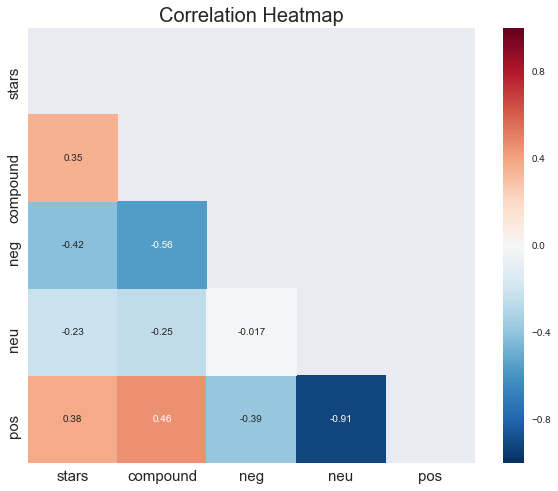

In [36]:
plot_corr(onion_soup_reviews)

As expected, reviews with higher `pos` score tend to be associated with higher star ratings, and reviews with higher `neg` tend to have lower star ratings.

## Predict Sentiment of Food

### Benchmark model: Mean of Compound Sentiment, scaled to 1 to 5 stars

Transform continuous `[-1.0, 1.0]` range to discrete `[1, 5]`  

In [37]:
def transform_to_stars(n, lower = -1, upper = 1):
    '''
    Transform n to a discrete value between 1 to 5, inclusive.
    '''
    if n < lower or n > upper:
        print(f'OutOfRangeError: Set n between [{lower},{upper}]')
        return None
    
    interval = np.round((upper - lower) / 9, 2)
    bins = [np.round(lower + i*interval, 2) for i in range(0,10)]
#     print(interval)
#     print(bins)
    
    # one star is the lowest rating, can't get 0.5 star
    n_categories = 9
    
    for i in range(2,11):
        if bins[i-2] <= n <= bins[i-1]:
#             print(i)
            return i/2

    if n >= bins[-1]:
        return 5.0


In [38]:
def rescale_to_stars(scores, lower = -1, upper = 1):
    '''
    Rescale list of values to discrete values between 1 to 5, inclusive.

    Distributes the 5-star system to a uniform distribution of the input range.
    '''    
    interval = np.round((upper - lower) / 5, 2)
    bins = [np.round(lower + i*interval, 2) for i in range(0, 6)]

    return list(pd.cut(scores, bins = bins, labels = np.arange(1, 6, 1), include_lowest = True))


#### Review-Level Predictions

In [39]:
onion_soup_reviews['stars_pred'] = rescale_to_stars(onion_soup_reviews['compound'])

In [40]:
onion_soup_reviews[['text', 'compound', 'stars', 'stars_pred']].head()

,text,compound,stars,stars_pred
0,"Other than being right across the Fountains of Bellagio, I'm not quite sure what the hype is about this place. We came here for brunch during peak hour, but luckily had a reservation so ended up waiting only a few minutes. Our table ordered Bordelaise Steak Frites (with caramelized onion and red wine sauce); Chicken and Mushroom Crepe (with kale and brie); Seafood Crepe (with scallops, shrimp, peas and cream); Onion soup; and Eggs Benedict (with Canadian bacon and hollandaise sauce). The steak frites and onion soup were the best things we ordered. Steak frites came with a huge chunk of juicy steak and a side of crispy, salted fries. Onion soup was also a nice, big portion, but I can't say it stood out from other onion soups I've had. Can't speak for the chicken and mushroom crepe since I didn't get to try it, but everything else truthfully fell short of expectations. The seafood crepe not only lacked flavor, but also was too creamy and heavy for my taste. The large pieces of shrimp and scallops saved the dish, but overall, the crepe was just okay. Eggs benedict here is definitely not a stand-out dish, either. The muffin was too hard and I've definitely had better hollandaise sauce.",0.9895,2,5
1,"French onion soup was watery with little taste. We sent it back and were refunded the cost. The wait staff also forgot that we were there for a birthday and didn't bring out a candle for dessert. On the plus side my trout was wonderful and my wife enjoyed her scallops. We've been a number of times but this last meal has tarnished that ""must visit"" image. Pricing is reasonable for Vegas and reservations can usual be booked same day.",0.5647,3,4
2,"Where to begin! Now our dining experience here was not a common one - we were treated to dinner here. We ate almost everything on the menu - although their French Onion Soup wasn't spectacular, their baked goat cheese, fresh French bread and steaks were to die for. They had a great wine selection, and our server, Angie, was phenomenal. She had great wine recommendations and was overall a joy to have. Would definitely eat here again! Thank you George at the Paris for everything!",0.9475,5,5
3,"Charming resturant that looks like it would be heavily overpriced. Been here twice now and really enoued the onion soup, they are not stingey on the gruyer cheese! Endive and pear salad was a bit salty for my taste but there's plenty more to choose from. Baugettes were real tasty!",0.5767,4,4
4,"This review is long overdue! I have been eating here for years, it is always on my ""must have"" list when visiting vegas. I have NEVER been disappointed with the food or service in the many years I have eaten here. I love everything on the menu. EVERYTHING. Honestly you cant go wrong. The french onion soup, the bread, the steaks, the seafood, dessert - it is all fabulous. Thank you mon ami for being my favorite vegas restaurant!",0.9674,5,5


#### Sentence-Level Predictions

In [41]:
onion_soup_sentences['stars_pred'] = rescale_to_stars(onion_soup_sentences['compound'])
onion_soup_sentences[['text', 'compound', 'stars_pred']].head()


,text,compound,stars_pred
0,"Our table ordered Bordelaise Steak Frites (with caramelized onion and red wine sauce); Chicken and Mushroom Crepe (with kale and brie); Seafood Crepe (with scallops, shrimp, peas and cream); Onion soup; and Eggs Benedict (with Canadian bacon and hollandaise sauce)",0.0000,3
1,The steak frites and onion soup were the best things we ordered,0.6369,5
2,"Onion soup was also a nice, big portion, but I can't say it stood out from other onion soups I've had",0.2263,4
3,French onion soup was watery with little taste,0.0000,3
4,"We ate almost everything on the menu - although their French Onion Soup wasn't spectacular, their baked goat cheese, fresh French bread and steaks were to die for",-0.3818,2


#### Entity-Level Predictions

In [42]:
onion_soup_chunks['stars_pred'] = rescale_to_stars(onion_soup_chunks['compound'])
onion_soup_chunks[['text', 'compound', 'stars_pred']].head()


,text,compound,stars_pred
0,crepe with scallops shrimp peas and cream onion soup and eggs benedict with canadian bacon and,0.0000,3
1,the steak frites and onion soup were the best things we ordered,0.6369,5
2,onion soup was also a nice big portion but,0.2263,4
3,french onion soup was watery with little taste,0.0000,3
4,everything on the menu although their french onion soup wasnt spectacular their baked goat cheese fresh,0.3182,4


### Final predictions without dropping `compound=0` rows

#### Using the mean of `compound`

In [43]:
# final prediction
review_score = np.round(onion_soup_reviews['compound'].mean(), 4)
sentence_score = np.round(onion_soup_sentences['compound'].mean(), 4)
chunk_score = np.round(onion_soup_chunks['compound'].mean(), 4)

print(f'Review-level Score:\t{review_score}')
print(f'Review-level Rating:\t{transform_to_stars(review_score)}')
print()
print(f'Sentence-level Score:\t{sentence_score}')
print(f'Sentence-level Rating:\t{transform_to_stars(sentence_score)}')
print()
print(f'Entity-level Score:\t{chunk_score}')
print(f'Entity-level Rating:\t{transform_to_stars(chunk_score)}')



Review-level Score:	0.8735
Review-level Rating:	5.0

Sentence-level Score:	0.3865
Sentence-level Rating:	4.0

Entity-level Score:	0.2885
Entity-level Rating:	3.5


#### Using the mean of `stars_pred`

In [44]:
# final prediction
review_star_score = np.round(onion_soup_reviews['stars_pred'].mean(), 1)
sentence_star_score = np.round(onion_soup_sentences['stars_pred'].mean(), 1)
chunk_star_score = np.round(onion_soup_chunks['stars_pred'].mean(), 1)

print(f'Review-level Rating:\t{review_star_score}')
print(f'Sentence-level Rating:\t{sentence_star_score}')
print(f'Entity-level Rating:\t{chunk_star_score}')

Review-level Rating:	4.8
Sentence-level Rating:	4.0
Entity-level Rating:	3.7


### Final predictions after dropping `compound=0` rows

In [45]:
# drop compound=0
onion_soup_reviews2   = onion_soup_reviews.drop(onion_soup_reviews[onion_soup_reviews['compound']==0].index)
onion_soup_sentences2 = onion_soup_sentences.drop(onion_soup_sentences[onion_soup_sentences['compound']==0].index)
onion_soup_chunks2    = onion_soup_chunks.drop(onion_soup_chunks[onion_soup_chunks['compound']==0].index)



#### Using the mean of `compound`

In [46]:
# final prediction
review_score2 = np.round(onion_soup_reviews2['compound'].mean(), 4)
sentence_score2 = np.round(onion_soup_sentences2['compound'].mean(), 4)
chunk_score2 = np.round(onion_soup_chunks2['compound'].mean(), 4)

print(f'Review-level Score:\t{review_score2}')
print(f'Review-level Rating:\t{transform_to_stars(review_score2)}')
print()
print(f'Sentence-level Score:\t{sentence_score2}')
print(f'Sentence-level Rating:\t{transform_to_stars(sentence_score2)}')
print()
print(f'Entity-level Score:\t{chunk_score2}')
print(f'Entity-level Rating:\t{transform_to_stars(chunk_score2)}')

Review-level Score:	0.8755
Review-level Rating:	5.0

Sentence-level Score:	0.5155
Sentence-level Rating:	4.0

Entity-level Score:	0.44
Entity-level Rating:	4.0


#### Using the mean of `stars_pred`

In [47]:
# final prediction
review_star_score2 = np.round(onion_soup_reviews2['stars_pred'].mean(), 1)
sentence_star_score2 = np.round(onion_soup_sentences2['stars_pred'].mean(), 1)
chunk_star_score2 = np.round(onion_soup_chunks2['stars_pred'].mean(), 1)

print(f'Review-level Rating:\t{review_star_score2}')
print(f'Sentence-level Rating:\t{sentence_star_score2}')
print(f'Entity-level Rating:\t{chunk_star_score2}')

Review-level Rating:	4.8
Sentence-level Rating:	4.3
Entity-level Rating:	4.1


In [48]:
business_df = pd.read_csv('../data/interim/restaurants.csv')

In [49]:
business_df[business_df['business_id'] == '4JNXUYY8wbaaDmk3BPzlWw']

,name,business_id,stars,review_count,categories,longitude,latitude,postal_code,city,state
42060,Mon Ami Gabi,4JNXUYY8wbaaDmk3BPzlWw,4.0,7968,"Steakhouses, Breakfast & Brunch, Restaurants, French",-115.172581,36.112827,89109,Las Vegas,NV


### Plot Distribution of Sentiments

In [50]:
def compare_hist(cols, titles, xlabel, ylabel, bins = 30, save=False, fname="../images/fig.png"):
    ncols = len(cols)
    fig, axes = plt.subplots(ncols   = ncols, 
                             figsize = (5*ncols, 5), 
                             sharex  = True)
    for i in range(ncols):
        axes[i].hist(cols[i], bins = bins)
        
        axes[i].set_title(titles[i], fontsize = 20)
        axes[i].set_xlabel(xlabel, fontsize = 15)
        axes[i].set_ylabel(ylabel, fontsize = 15)
        
    plt.tight_layout()
    
    if save:
        plt.savefig(fname)


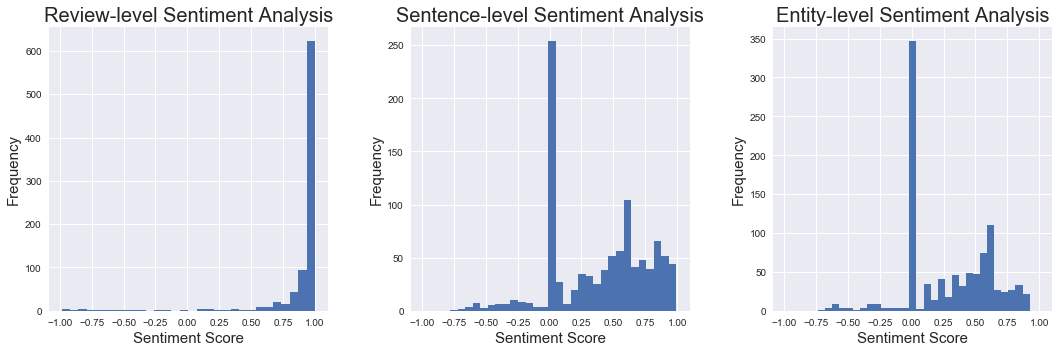

In [51]:
compare_hist([onion_soup_reviews['compound'], onion_soup_sentences['compound'], onion_soup_chunks['compound']],
             titles = ['Review-level Sentiment Analysis', 'Sentence-level Sentiment Analysis', 'Entity-level Sentiment Analysis'],
             xlabel = 'Sentiment Score',
             ylabel = 'Frequency')


At the **review-level**, `compound` sentiment scores tend to be inflated towards the maximum value. This may be due to a limitation of the nltk `SentimentIntensityAnalyzer` (SIA) model on documents with too many words.  

At the **sentence-level**, `compound` sentiment scores start to have a more interesting distribution.  
However, there appears to be a high frequency of neutral scores (`compound`~=0). Could this be due to mixed sentiments within sentences? This may affect the true distribution. Entity-level SIA may be able to address this issue.  

**Entity-level** SIA reveals that even more chunks have neutral or undeterminable sentiments.

Reviews with no sentiment score will be dropped.




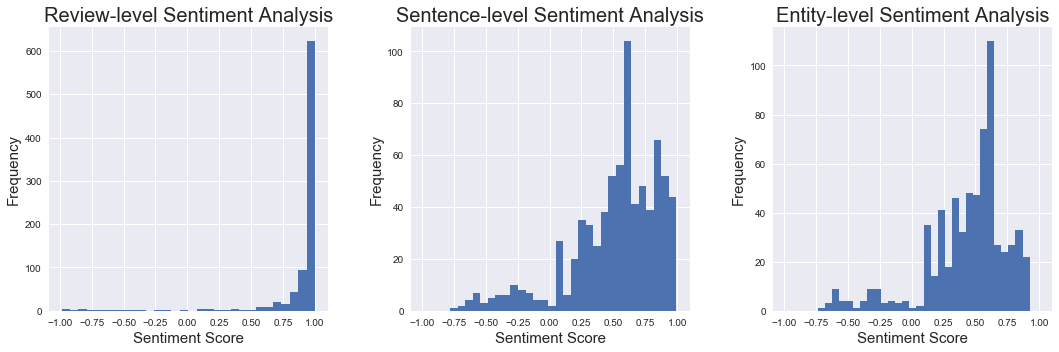

In [52]:
compare_hist([onion_soup_reviews2['compound'], onion_soup_sentences2['compound'], onion_soup_chunks2['compound']],
             titles = ['Review-level Sentiment Analysis', 'Sentence-level Sentiment Analysis', 'Entity-level Sentiment Analysis'],
             xlabel = 'Sentiment Score',
             ylabel = 'Frequency', 
             save=True, 
             fname='../images/sia-by-level-of-detail.png')
